# Google Play Apps - Exploratory Data Analysis


## Introduction

We'll use the Google Play Apps Web scraped data of 10k Play Store apps for analysing the Android market.You can find the raw data & results here: https://www.kaggle.com/lava18/google-play-store-apps.

### Description of Dataset
We are going to use a simple csv file "googleplaystore.csv", available on Kaggle,let's have a look at our main characters :-

   1. App :- Name of the App
   2. Category :- Category under which the App falls.
   3. Rating :- Application's rating on playstore
   4. Reviews :- Number of reviews of the App.
   5. Size :- Size of the App.
   6. Install :- Number of Installs of the App
   7. Type :- If the App is free/paid
   8. Price :- Price of the app (0 if it is Free)
   9. Content Rating :- Appropiate Target Audience of the App.
   10. Genres:- Genre under which the App falls.
   11. Last Updated :- Date when the App was last updated
   12. Current Ver :- Current Version of the Application
   13. Android Ver :- Minimum Android Version required to run the App

### Cleaning Data
We are going to clean these contents of data:-

     A. Category
     B. Rating
     C. Reviews
     D. Size
     E. Installs
     F. Price
     G. Last Updated
### Exploratory Data Analysis
We are going to analyse these:-

     A. Content Rating
     B. Category and Reviews
     C. Top Categories
     D. Rating Distribution
     E. Correlation Map

In [4]:
project_name = "googleplaystoreapps-project-eda"

In [5]:
!pip install jovian --upgrade -q

In [6]:
import jovian

In [7]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "dharmeshvishwakarma2000/googleplaystoreapps-project-eda" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/dharmeshvishwakarma2000/googleplaystoreapps-project-eda


'https://jovian.ml/dharmeshvishwakarma2000/googleplaystoreapps-project-eda'

## Data Preparation and Cleaning

In [8]:
#import the numpy and pandas python library
import numpy as np
import pandas as pd

In [9]:
#load the data
data_df=pd.read_csv('googleplaystore.csv')

In [10]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [11]:
#columns of the data
data_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [12]:
data_df.shape

(10841, 13)

# Cleaning Data
Dataset can contain missing data, numerical string value, various cues. If we can clean them, we can make easy our analysis.

## A).Category

cleaning of the Category column

In [13]:
data_df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [14]:
#'1.9' is wrong value. So I have to see in which rows '1.9' corresponds to.

data_df[data_df['Category'] == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [15]:
#We can make NaN category value. At that time we can get a clean data. I used shift() method that is found Pandas library.

data_df.loc[10472] = data_df.loc[10472].shift()
data_df['App'].loc[10472] = data_df['Category'].loc[10472]
data_df['Category'].loc[10472] = np.nan
data_df.loc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              NaN
Rating                                                1.9
Reviews                                                19
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Genres                                                NaN
Last Updated                            February 11, 2018
Current Ver                                        1.0.19
Android Ver                                    4.0 and up
Name: 10472, dtype: object

## B).Rating
cleaning of the Rating column

In [16]:
data_df['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4.0, nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5.0, 2.6, 3.0, 1.9, 2.5, 2.8,
       2.7, 1.0, 2.9, 2.3, 2.2, 1.7, 2.0, 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2, '1.9'], dtype=object)

In [17]:
#Data type of Rating is object. If we convert from string to numeric, we can make easy.

data_df['Rating'] = pd.to_numeric(data_df['Rating'], errors='coerce')
data_df['Rating'].dtype

dtype('float64')

## C).Reviews
cleaning of the Reviews column

In [18]:
data_df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [19]:
data_df[data_df['Reviews'] =='3.0M']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [20]:
data_df['Reviews'] = data_df.Reviews.replace("0.0",0)
data_df['Reviews'] = data_df.Reviews.replace("3.0M",3000000.0)
data_df['Reviews'] = data_df['Reviews'].astype(float)
data_df['Reviews'].dtype

dtype('float64')

## D).Size
cleaning of the Size column

In [21]:
data_df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

Data type of Size is object. I had to convert the column because it contains the application sizes. Firstly I changed 'Varies with device' value with Nan. After, I dropped 'M' and 'k'. I changed from '1000+' to 1000. Finally, I converted float value.

In [22]:
data_df['Size'] = data_df.Size.replace("Varies with device",np.nan)
data_df['Size'] = data_df.Size.str.replace("M","000") # All size values became the kilobyte type.
data_df['Size'] = data_df.Size.str.replace("k","")
data_df['Size'] = data_df.Size.replace("1,000+",1000)
data_df['Size'] =data_df['Size'].astype(float)
data_df['Size'].dtype

dtype('float64')

## E).Installs
cleaning of the Installs column

In [23]:
data_df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

Data type of Size is object. I'm gonna make similar processes, which I made the in 'Size'.

In [24]:
data_df['Installs'] = data_df.Installs.str.replace(",","")
data_df['Installs'] = data_df.Installs.str.replace("+","")
data_df['Installs'] = data_df.Installs.replace("Free",np.nan)
data_df['Installs'] = data_df['Installs'].astype(float)
data_df['Installs'].dtype

dtype('float64')

## F).Price
cleaning of the Price column

In [25]:
data_df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

Data type of Price is object. I have made similar processes, which I made the in 'Size'.

In [26]:
data_df['Price'] = data_df.Price.replace("Everyone",np.nan)
data_df['Price'] = data_df.Price.str.replace("$","").astype(float)
data_df['Price'].dtype

dtype('float64')

## G).Last Updated
cleaning of the Last Update column 

In [27]:
data_df['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

Data type of Last Uptated is object. I converted from string to date type.

In [28]:
data_df['Last Updated'] = pd.to_datetime(data_df['Last Updated'])
data_df['Last Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 10841, dtype: datetime64[ns]

In [29]:
data_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000.0,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53000.0,5000.0,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.6,100.0,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3.0,9.5,1000.0,Free,0.0,Everyone,Medical,2017-01-20,1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,NaN,1000.0,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device


Now our data in cleaned and we can analys it...

In [30]:
import jovian

In [31]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "dharmeshvishwakarma2000/googleplaystoreapps-project-eda" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/dharmeshvishwakarma2000/googleplaystoreapps-project-eda


'https://jovian.ml/dharmeshvishwakarma2000/googleplaystoreapps-project-eda'

## Exploratory Analysis and Visualization
We are going to analysing and visualizing the survey of Google Play Store Apss rating,reviews,updates apps,most installed apps and in the between relations.

#### Import matplot,seaborn python libraries and set the styles,font,figsize and matplot magic command

In [32]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### A). Content Rating

TO Visualize the Content Ratings of the apps.

In [33]:
data_df['Content Rating'].value_counts()

Everyone           8715
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

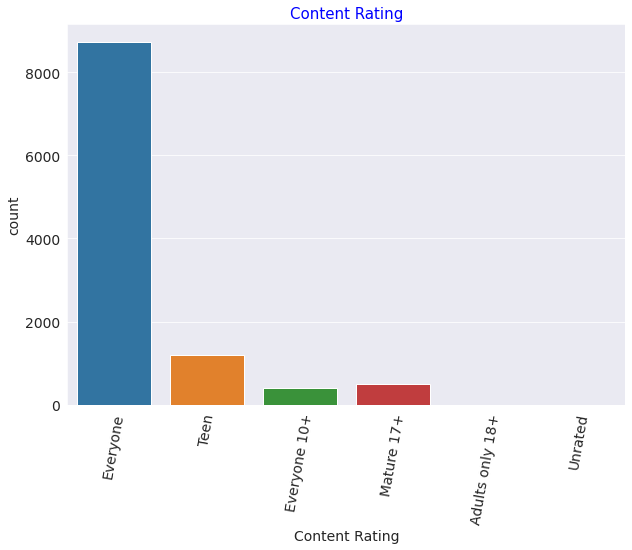

In [34]:
plt.figure(figsize=(10,7))
sns.countplot(data=data_df, x='Content Rating')
plt.xticks(rotation=80)
plt.title('Content Rating',color = 'blue',fontsize=15)
plt.show()

The above countplot represents the higest and lowest content ratings of the play store apps.

### B). Category and Reviews

To visualize and analyze the relation between category and reviews of the apps

In [35]:
data_df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION', nan],
      dtype=object)

In [36]:
data_df['Reviews'].unique()

array([1.59000e+02, 9.67000e+02, 8.75100e+04, ..., 6.03000e+02,
       1.19500e+03, 3.98307e+05])

In [37]:
category_list = list(data_df['Category'].unique())
category_review = []
for i in category_list:
    x = data_df[data_df['Category'] == i]
    if(len(x)!=0):
        review = sum(x.Reviews)/len(x)
        category_review.append(review)
    else:
        review = sum(x.Reviews)
        category_review.append(review)
#sorting
data_category_reviews = pd.DataFrame({'category': category_list,'review':category_review})
new_index = (data_category_reviews['review'].sort_values(ascending=False)).index.values
sorted_data =data_category_reviews.reindex(new_index)

Make a list of Category and Reviews data to make a sorted_data dataframe that stored the sorted values of the both columns

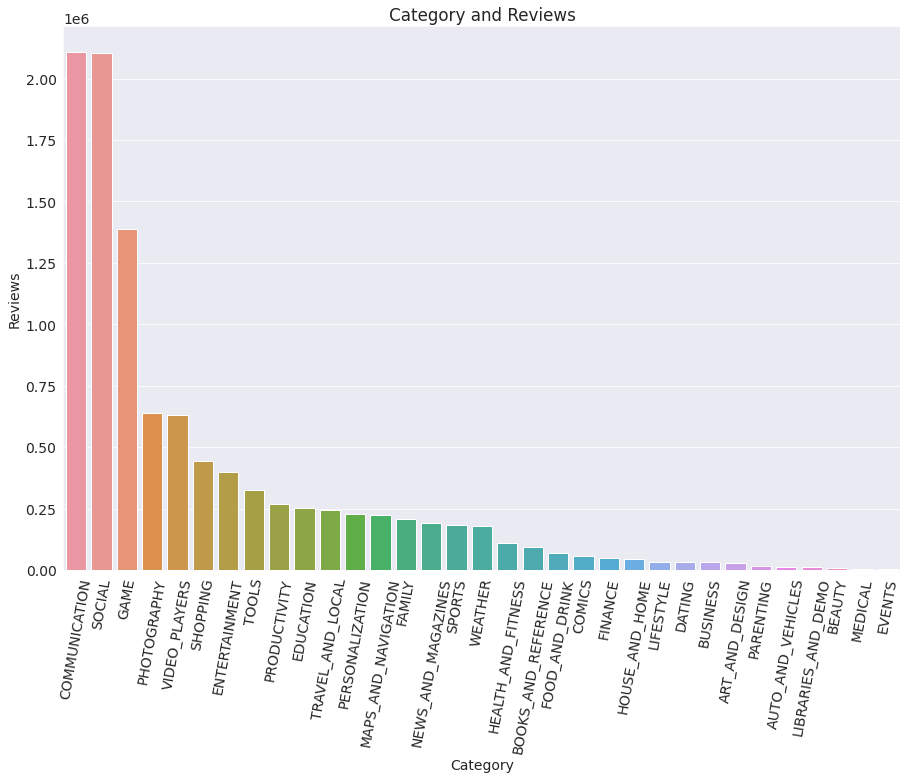

In [38]:
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data['category'], y=sorted_data['review'])
plt.xticks(rotation=80)
plt.xlabel("Category")
plt.ylabel("Reviews")
plt.title("Category and Reviews")
plt.show()

The above bar chart represents the reviews of each category of apps,the highest review is 21,30,00,000 of COMMUNICATION category and the lowest is EVENTS category.

### C). Top Categories Apps
Visualize the top category apps

In [39]:
data_df['Category'].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
COMICS                   60
PARENTING                60
BEAUTY                   53
Name: Category, dtype: int64

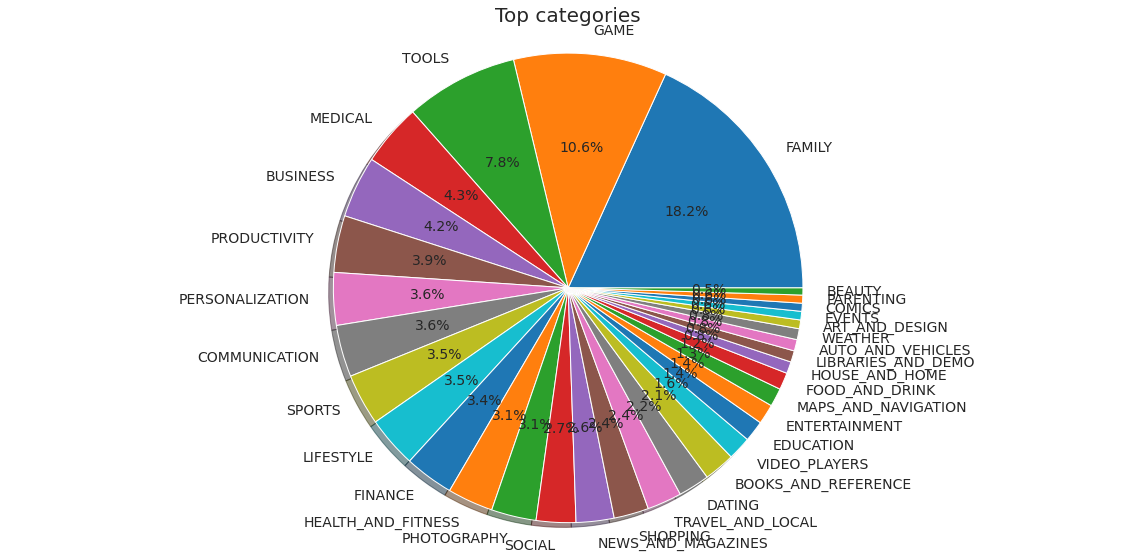

In [40]:
# plot pie chart
fig = plt.figure(figsize=(16,8)) 
labels = data_df['Category'].value_counts(sort = True).index
sizes = data_df['Category'].value_counts(sort = True)
plt.pie(sizes,labels=labels,autopct='%1.1f%%', shadow=True)
plt.title('Top categories',size = 20)
plt.axis('equal')
plt.tight_layout()
plt.show()

The above pie chart is represents the top categories of the apps,the highest is Family 18.2% then Game 10.6%,the lowest is BEAUTY.

### D). Rating Distribution 

In [41]:
data_df['Rating'].value_counts()

4.4    1109
4.3    1076
4.5    1038
4.2     952
4.6     823
4.1     708
4.0     568
4.7     499
3.9     386
3.8     303
5.0     274
3.7     239
4.8     234
3.6     174
3.5     163
3.4     128
3.3     102
4.9      87
3.0      83
3.1      69
3.2      64
2.9      45
2.8      42
2.6      25
2.7      25
2.5      21
2.3      20
2.4      19
1.0      16
2.2      14
1.9      14
2.0      12
1.7       8
2.1       8
1.8       8
1.6       4
1.4       3
1.5       3
1.2       1
Name: Rating, dtype: int64

Let's create a scatter plot of Reviews vs. Rating

Text(0, 0.5, 'Rating')

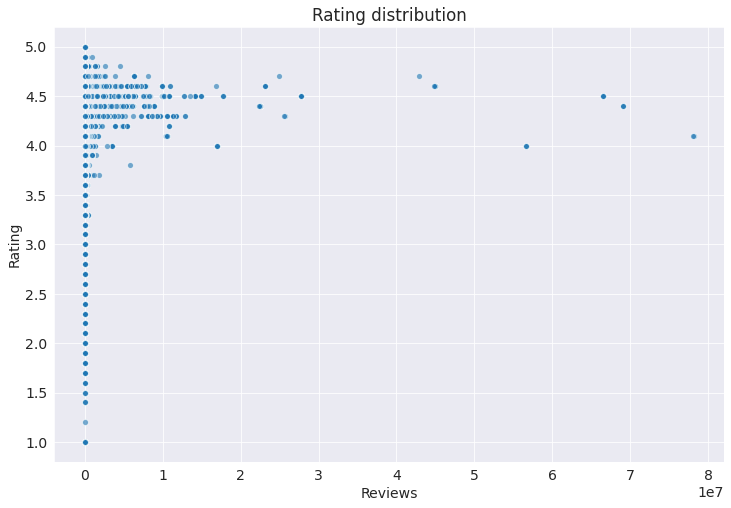

In [46]:
# plot the scatter plot

fig = plt.figure(figsize=(12,8)) 
plt.scatter(data_df['Reviews'],data_df['Rating'],edgecolor='white',linewidth=1,alpha=0.60)
plt.title('Rating distribution')
plt.xlabel('Reviews')
plt.ylabel('Rating')

You can see points all over the graph, which seems to indicate that reviews and ratings distributions.

### E). Correlation Map

Use corr() function to compute the correletion of the ratings of apps,size of the apps,installs and prices of the apps.

In [47]:
data_df.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.068147,0.082495,0.051393,-0.021851
Reviews,0.068147,1.000000,0.233795,0.643123,-0.009666
Size,0.082495,0.233795,1.000000,0.164616,-0.022766
Installs,0.051393,0.643123,0.164616,1.000000,-0.011688
Price,-0.021851,-0.009666,-0.022766,-0.011688,1.000000


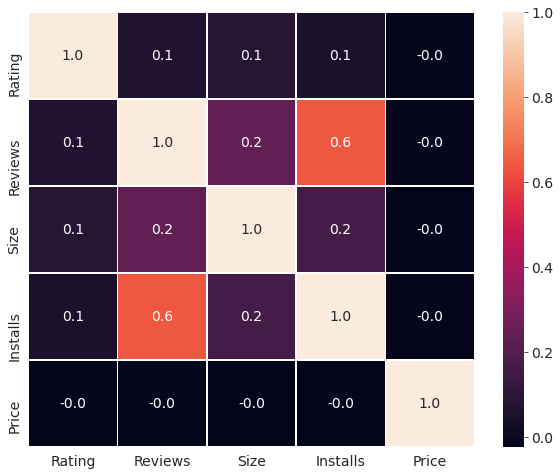

In [48]:
#heatmap map

f,ax = plt.subplots(figsize=(10, 8))
sns.heatmap(data_df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

The above heat map represents the correlations, the darkest colour is lowest and white is highest correlation between the ratings ,reviews,size,installs and price of the apps.

In [49]:
import jovian

In [50]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "dharmeshvishwakarma2000/googleplaystoreapps-project-eda" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/dharmeshvishwakarma2000/googleplaystoreapps-project-eda


'https://jovian.ml/dharmeshvishwakarma2000/googleplaystoreapps-project-eda'

## Asking and Answering Questions

### Q1. What is the average rating of the applications in each categories?

To answer this we will use the aggregate groupby of category and compute the mean and sort the ratings in descending orders for each categories

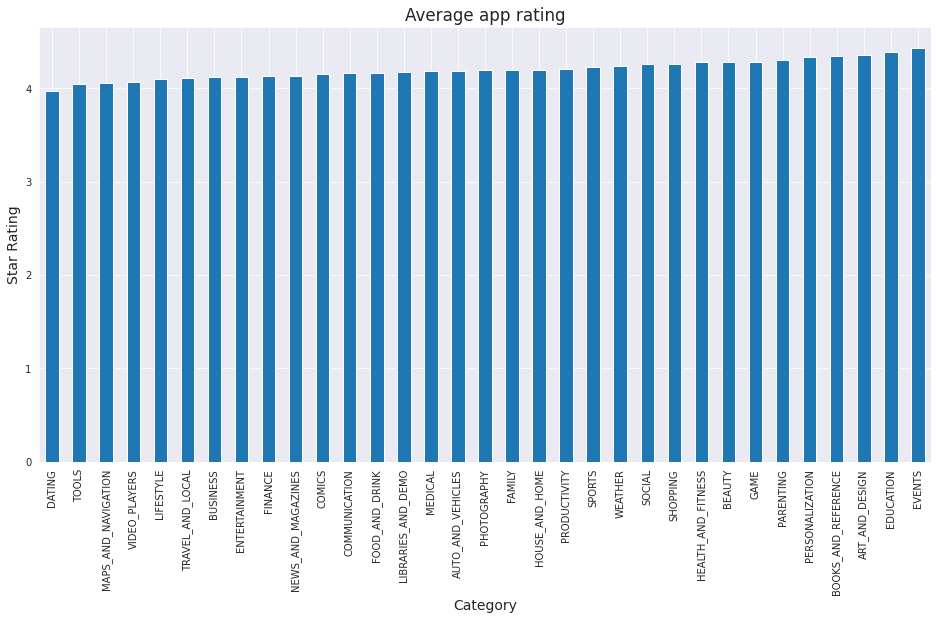

In [51]:
fig = plt.figure(figsize=(16,8)) 
data_df.groupby('Category').mean().sort_values(by='Rating',ascending='False')['Rating'].plot(kind='bar',title='Average app rating', fontsize=10)
plt.ylabel('Star Rating') 
plt.style.use('seaborn-white')

The above bar chart represents the average rating of each categories apps,the highest rating is EVENTS apps,and the avarage of rating of each categories is in between 3.9 and 4.8 ratings.

### Q2.What are the applications with, most number of reviews, highest rating, most revenue through installs, most number of installs?

To answer this we will use the Reviews,Rating,Installs and Price columns to apply max() function and use the iloc[] of App column.

In [52]:
print("Maximum number of reviews count is of : "+ data_df[data_df['Reviews']==data_df.Reviews.max()]["App"].iloc[0] + " with a value of " + str(data_df.Reviews.max()))
print("Maximum Rating is of : "+ data_df[data_df['Rating']==data_df.Rating.max()]["App"].iloc[0] + " with a value of " + str(data_df.Rating.max()))
print("Maximum number of installs is of : "+ data_df[data_df['Installs']==data_df.Installs.max()]["App"].iloc[0] + " with a value of " + str(data_df.Installs.max()))
print("Maximum price is of : "+ data_df[data_df['Price']==data_df.Price.max()]["App"].iloc[0] + " with a value of " + str(data_df.Price.max()))

Maximum number of reviews count is of : Facebook with a value of 78158306.0
Maximum Rating is of : Hojiboy Tojiboyev Life Hacks with a value of 5.0
Maximum number of installs is of : Google Play Books with a value of 1000000000.0
Maximum price is of : I'm Rich - Trump Edition with a value of 400.0


The Maximum number of reviews count is "Facebook with a value of 78158306.0" ,Maximum Rating is "Hojiboy Tojiboyev Life Hacks with a value of 5.0", Maximum number of installs is "Google Play Books with a value of 1000000000.0", Maximum price is " I'm Rich - Trump Edition with a value of 400.0"

### Q3.How many percent of applications are free and how many are paid?

To answer this question we need "Price" column.

In [54]:
data_df['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

make a copy of dataframe that never effect on original data 

In [55]:
df1= data_df.copy()

make a function that returns the 0 for paid and 1 for free apps.

In [56]:
def is_free(price):
    if price > 0:
        return 1
    else:
        return 0

In [57]:
df1.isna().sum()

App                  0
Category             1
Rating            1474
Reviews              0
Size              1695
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               1
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

make a new column "is_free" to store the paid and free apps by applying "is_free()" function.

In [58]:
df1["is_free"] = df1["Price"].apply(lambda x: int(is_free(x)))

In [59]:
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,is_free
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000.0,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,0


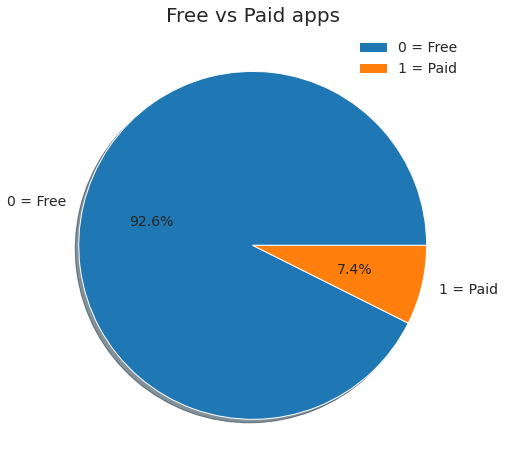

In [60]:
#to check how many apps are free create pie chart

fig = plt.figure(figsize=(16,8)) 
labels = ['0 = Free','1 = Paid']
sizes = df1['is_free'].value_counts(sort = True)
plt.pie(sizes,labels=labels,autopct='%1.1f%%', shadow=True)
plt.title('Free vs Paid apps',size = 20)
plt.legend()
plt.show()

The above pie chart shows the percentages of the total free apps and paid of the google store,the 92.6% apps are free and the 7.4% apps are paid.

### Q4.What is the average price of applications in each categories?

To answer this question let's make a bar plot of category aby the price.

Text(0, 0.5, 'Average price - USD')

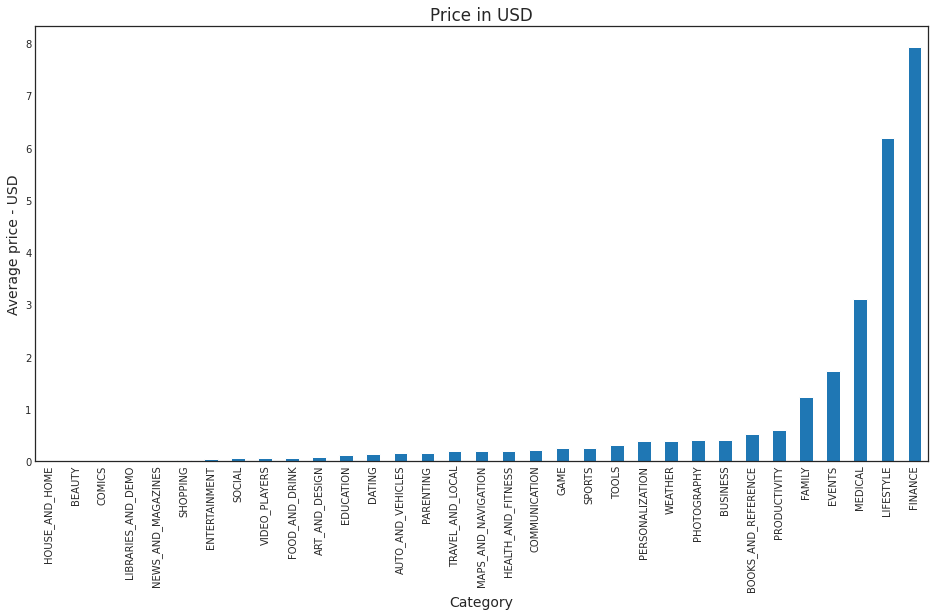

In [61]:
# shows into bar plot

fig = plt.figure(figsize=(16,8)) 
data_df.groupby('Category').mean().sort_values(by='Price',ascending='False')['Price'].plot(kind='bar',title='Price in USD', fontsize=10)
plt.ylabel('Average price - USD')

The above bar chart shows the price of each categories of apps,the highest average price is FINANCE and LIFESTYLE categories apps.

### Q5.What is the average size of the applications?

To answer this we use the mean(), max() and min() function and select `Size` column of dataframe.

In [62]:
print("Mean size " + str(data_df["Size"].mean()))
print("Heaviest app size " + str(data_df["Size"].max()))
print("Smalles app size " + str(data_df["Size"].min()))

Mean size 19577.279477367156
Heaviest app size 100000.0
Smalles app size 1.0


The average size of the apps are `19577 KB(kilobyte) or 19.5 MB` , highest app size is `100000 KB or 100 MB` and smallest app size is 1 MB.

In [63]:
import jovian

In [64]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "dharmeshvishwakarma2000/googleplaystoreapps-project-eda" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/dharmeshvishwakarma2000/googleplaystoreapps-project-eda


'https://jovian.ml/dharmeshvishwakarma2000/googleplaystoreapps-project-eda'

## Inferences and Conclusion

In this analysis,we've drawn many interesting inferences from the survey, here's a summary of the few of them:
* Games are the most installed category of the apps.
* Average rating is irrelevant to the category.
* Around 19.7% of the apps are related to family.
* 81.8% of the apps belong to everyone category.
* The top categories of the apps,the highest is Family 18.2% then Game 10.6%,the lowest is BEAUTY.
* The percentages of the total free apps and paid of the google store,the 92.6% apps are free and the 7.4% apps are paid.
* Maximum number of reviews count is of : Facebook with a value of 78158306 .
* Maximum Rating is of : EC SPORTS with a value of 5.0 .
* Maximum number of installs is of : Skype - free IM & video calls with a value of 1000000000.0 .
* Maximum price is of : I'm Rich - Trump Edition with a value of 400.0 .

In [3]:
import jovian

In [4]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "dharmeshvishwakarma2000/googleplaystoreapps-project-eda" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/dharmeshvishwakarma2000/googleplaystoreapps-project-eda


'https://jovian.ml/dharmeshvishwakarma2000/googleplaystoreapps-project-eda'

## References and Future Work

In this analysis,there's a wealth of information to be discovered using the survey of Google Play Stoe Apps. Here are some ideas for further exploration:

* Repeat the analysis for different apps groups & categories, and compare the results
* Prepare an analysis focusing on app updates - and identify the categories where the apps mostly used (eg.Games,Commumnications,etc)
* Compare the results of this rating's survey with the review's survey
* Compare the Free apps and Paid apps of the google play store
* Make Analysis of app size(eg. max,min size) and highest no. of installed apps

References:

* Google Play Store Apps Survey : https://www.kaggle.com/lava18/google-play-store-apps
* Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html
* Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html
* Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html
* Pandas Correlation Dataframe user guide: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

In [1]:
import jovian

In [2]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "dharmeshvishwakarma2000/googleplaystoreapps-project-eda" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/dharmeshvishwakarma2000/googleplaystoreapps-project-eda


'https://jovian.ml/dharmeshvishwakarma2000/googleplaystoreapps-project-eda'